In [58]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import rasterio
import matplotlib.pyplot as plt
import folium


In [2]:
lat_lon = (45.9951, -123.9201)
g = ox.graph_from_point(lat_lon, dist=8000, network_type='walk')

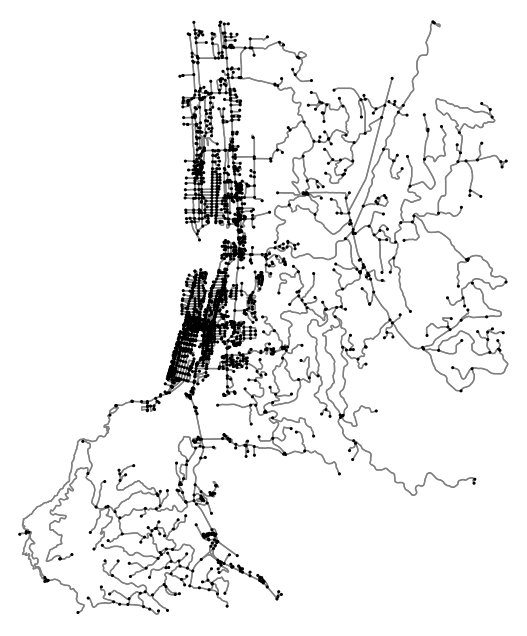

In [3]:
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [4]:
import os
os.environ['USE_PYGEOS'] = '0'

In [5]:
cities = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-scenarios/data_ibell/citylim_2021/citylim.shp')
cities.head()

CITY_NAME       instName unitID                         descriptn  \
0  Adair Village  Adair Village   ODOT  Incorporated City Limit Boundary   
1          Adams          Adams   ODOT  Incorporated City Limit Boundary   
2         Adrian         Adrian   ODOT  Incorporated City Limit Boundary   
3         Albany         Albany   ODOT  Incorporated City Limit Boundary   
4          Amity          Amity   ODOT  Incorporated City Limit Boundary   

  instCode codeRef   effDate unitOwner cSteward         acres EFFECTV_DT  \
0    00275    FIPS  20210000   2409661     ODOT    286.389671       2021   
1    00350    FIPS  20210000   2409662     ODOT    230.591317       2021   
2    00500    FIPS  20210000   2409664     ODOT    155.900900       2021   
3    01000    FIPS  20210000   2409675     ODOT  11342.259180       2021   
4    02000    FIPS  20210000   2409700     ODOT    402.796064       2021   

  GIS_PRC_DT     Shape_Leng    Shape_Area  \
0  9/20/2021   24645.761574  1.247513e+07   
1  9/20/2021   14345.564615  1.004456e+07   
2  9/20/2021   10511.276609  6.791043e+06   
3  9/20/2021  262984.796754  4.940688e+08   
4  9/20/2021   28212.961728  1.754580e+07   

                                            geometry  
0  POLYGON ((606486.544 1079731.871, 606519.008 1...  
1  POLYGON ((1806116.356 1467893.258, 1806055.680...  
2  POLYGON ((2219501.033 745901.646, 2219514.441 ...  
3  POLYGON ((629747.496 1076850.309, 630118.784 1...  
4  POLYGON ((614322.084 1240483.773, 614403.596 1...

In [6]:
seaside = cities[cities["CITY_NAME"]=="Seaside"]
seaside.head()

CITY_NAME instName unitID                         descriptn instCode  \
189   Seaside  Seaside   ODOT  Incorporated City Limit Boundary    65950   

    codeRef   effDate unitOwner cSteward        acres EFFECTV_DT GIS_PRC_DT  \
189    FIPS  20210000   2411854     ODOT  2614.179614       2021  9/20/2021   

        Shape_Leng    Shape_Area  \
189  145597.895628  1.138737e+08   

                                              geometry  
189  POLYGON ((445725.062 1572704.545, 445735.231 1...

In [7]:
node_graph = ox.graph_to_gdfs(g, nodes=True, edges=False)

In [8]:
edge_graph = ox.graph_to_gdfs(g, nodes=False, edges=True)

In [9]:
seaside.crs

<Derived Projected CRS: EPSG:2992>
Name: NAD83 / Oregon GIC Lambert (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon.
- bounds: (-124.6, 41.98, -116.47, 46.26)
Coordinate Operation:
- name: Oregon GIC Lambert (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
node_graph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
node_reproject = node_graph.to_crs('EPSG:32610')
edge_reproject = edge_graph.to_crs('EPSG:32610')
seaside_reproject = seaside.to_crs('EPSG:32610')

In [12]:
from shapely.geometry import Polygon

In [13]:
node_clip = node_reproject.clip(seaside_reproject)

<AxesSubplot: >

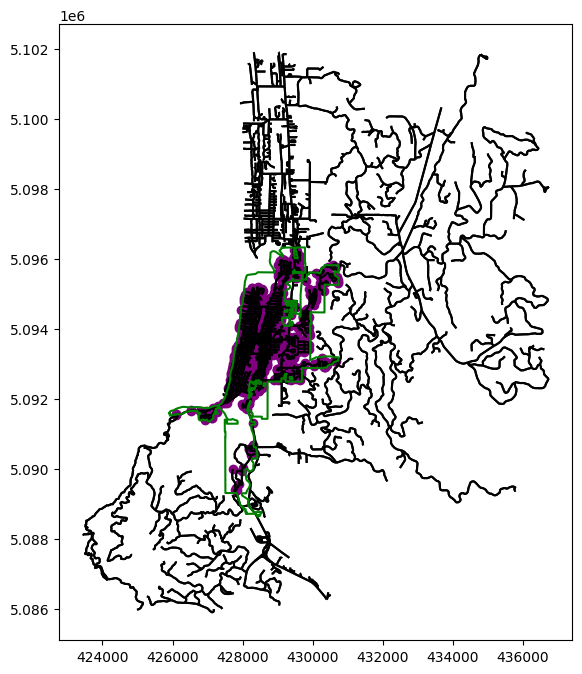

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
node_clip.plot(ax=ax, color="purple")
seaside_reproject.boundary.plot(ax=ax, color="green")

In [15]:
import elevation

In [16]:
assemblyareas = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/Assembly_Areas.shp')
highground = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/OutsideHazardArea_GreenHighGround.shp')
evac_zones = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/EvacuationZones.shp')

In [17]:
evac_zones.head()

Id                      Location                           Type  \
0   1  Central Coast Model - Grid A  Local Tsunami Evacuation Zone   
1   1  Central Coast Model - Grid B  Local Tsunami Evacuation Zone   
2   1  Central Coast Model - Grid C  Local Tsunami Evacuation Zone   
3   1                Coos Bay Model  Local Tsunami Evacuation Zone   
4   1                  Bandon Model  Local Tsunami Evacuation Zone   

                                            geometry  
0  POLYGON ((406752.100 1221857.044, 406766.586 1...  
1  POLYGON ((416074.855 1068832.798, 416052.962 1...  
2  POLYGON ((358894.444 856603.498, 358871.635 85...  
3  POLYGON ((335929.356 650082.869, 335836.290 65...  
4  POLYGON ((326110.596 542886.775, 326111.186 54...

In [18]:
seaside_buffer = seaside_reproject.envelope
seaside_buffer = seaside_buffer.scale(2.4,2)

<AxesSubplot: >

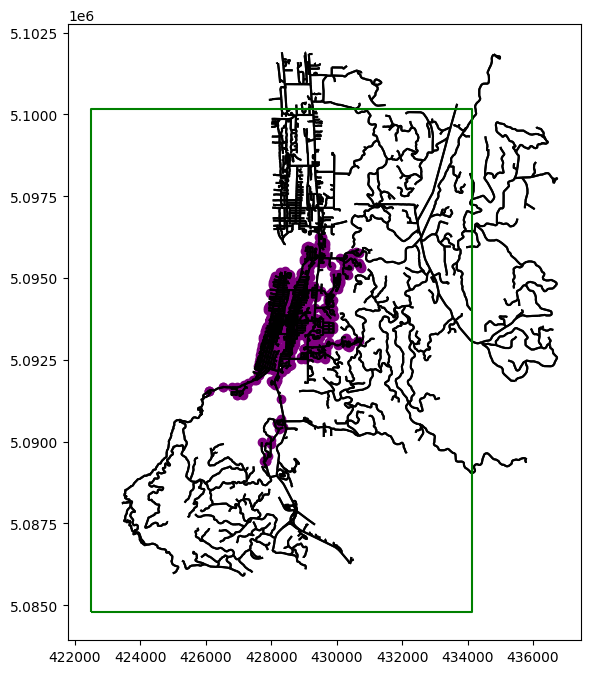

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
node_clip.plot(ax=ax, color="purple")
seaside_buffer.boundary.plot(ax=ax, color="green")

In [20]:
highground_reproject = highground.to_crs('EPSG:32610')
evac_reproject = evac_zones.to_crs('EPSG:32610')
assembly_reproject = assemblyareas.to_crs('EPSG:32610')

In [21]:
highground_clip = highground_reproject.clip(seaside_buffer)
evac_clip = evac_reproject.clip(seaside_buffer)
assembly_clip = assembly_reproject.clip(seaside_buffer)

<AxesSubplot: >

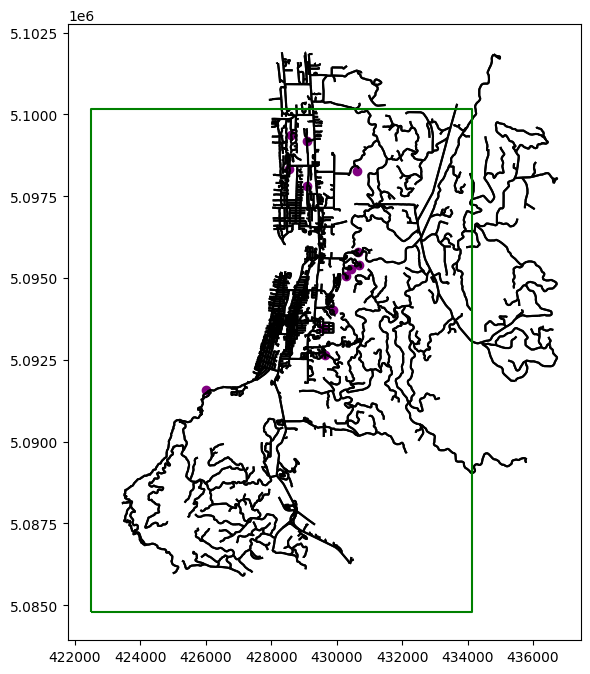

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
assembly_clip.plot(ax=ax, color="purple")
                               
seaside_buffer.boundary.plot(ax=ax, color="green")

<AxesSubplot: >

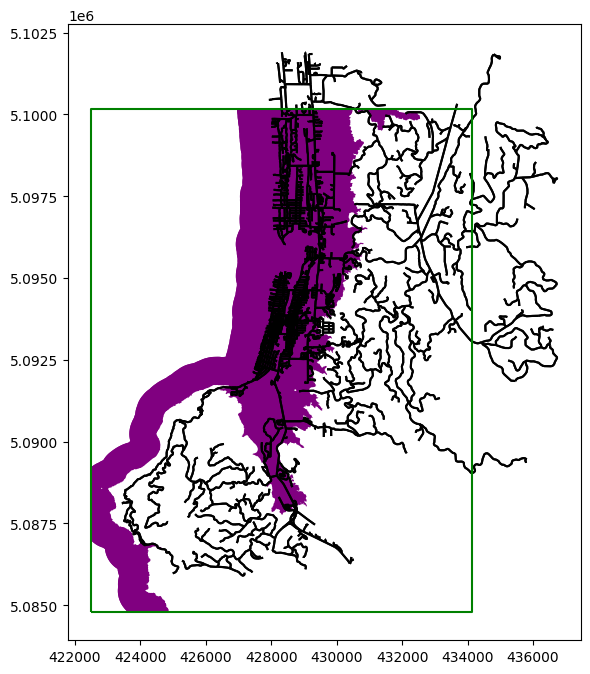

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
evac_clip.plot(ax=ax, color="purple")
seaside_buffer.boundary.plot(ax=ax, color="green")

<AxesSubplot: >

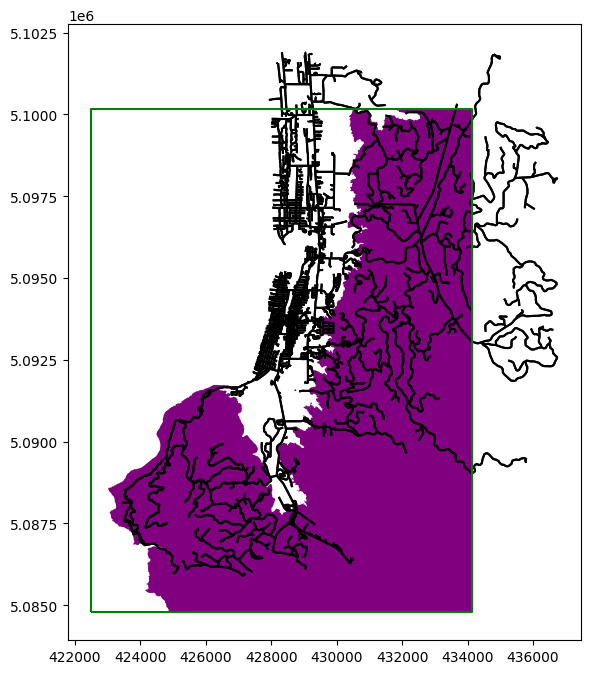

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
highground_clip.plot(ax=ax, color="purple")
seaside_buffer.boundary.plot(ax=ax, color="green")

In [25]:
highground_clip

FEATURE                                           geometry
457        3  POLYGON ((424878.288 5084786.940, 424876.494 5...
324        3  POLYGON ((428910.543 5088130.992, 428907.534 5...
325        3  POLYGON ((428734.503 5091597.531, 428740.456 5...

In [26]:
evac_clip

Id                Location                             Type  \
16   2  Clatsop Model - Grid B  Distant Tsunami Evacuation Zone   
13   1  Clatsop Model - Grid B    Local Tsunami Evacuation Zone   

                                             geometry  
16  POLYGON ((429339.139 5093815.993, 429335.995 5...  
13  MULTIPOLYGON (((431826.492 5100160.536, 431844...

In [27]:
assembly_clip

Location                           notes   County  \
8        Broadway St/Hilltop Dr                            None  Clatsop   
6                    Summit Ave         OPTIONAL-Large Scenario  Clatsop   
2                  Gearhart Ave         OPTIONAL-Large Scenario  Clatsop   
3     Pine Ridge Dr/Shamrock Rd         OPTIONAL-Large Scenario  Clatsop   
5                   Sheridan Dr         OPTIONAL-Large Scenario  Clatsop   
220  Huckleberry Dr & Cooper St            E end of Huckleberry  Clastop   
221                  Skyline Dr                            None  Clatsop   
222           Thompson Falls Dr                            None  Clastop   
223              Middle Fork Rd                            None  Clatsop   
224               North Fork Rd                            None  Clastop   
7                 Royal View Dr                 Near water tank  Clatsop   
4                    Water tank  via trail/road off Salminen Ln  Clatsop   
219            Ecola State Park                            None  Clastop   

               Evac_Map                        geometry  
8    Seaside & Gearhart  POINT (429575.668 5093476.077)  
6    Seaside & Gearhart  POINT (429096.758 5097799.423)  
2    Seaside & Gearhart  POINT (428547.445 5098341.592)  
3    Seaside & Gearhart  POINT (429077.215 5099188.755)  
5    Seaside & Gearhart  POINT (428607.060 5099368.658)  
220  Seaside & Gearhart  POINT (429641.554 5092655.575)  
221  Seaside & Gearhart  POINT (429874.781 5094025.053)  
222  Seaside & Gearhart  POINT (430279.949 5095065.704)  
223  Seaside & Gearhart  POINT (430442.178 5095278.924)  
224  Seaside & Gearhart  POINT (430682.984 5095408.532)  
7    Seaside & Gearhart  POINT (430652.726 5095778.767)  
4    Seaside & Gearhart  POINT (430617.434 5098276.426)  
219  Seaside & Gearhart  POINT (426000.105 5091573.677)

In [28]:
XL = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/Statewide_Tsunami_Scenarios/Statewide_XL_Tsunami_Inundation_Scenario.shp')
XXL = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/Statewide_Tsunami_Scenarios/Statewide_XXL_Tsunami_Inundation_Scenario.shp')

In [29]:
XL_reproject = XL.to_crs('EPSG:32610')
XXL_reproject = XXL.to_crs('EPSG:32610')

In [30]:
XL_clip = XL_reproject.clip(seaside_buffer)
XXL_clip = XXL_reproject.clip(seaside_buffer)

(5087000.0, 5099000.0)

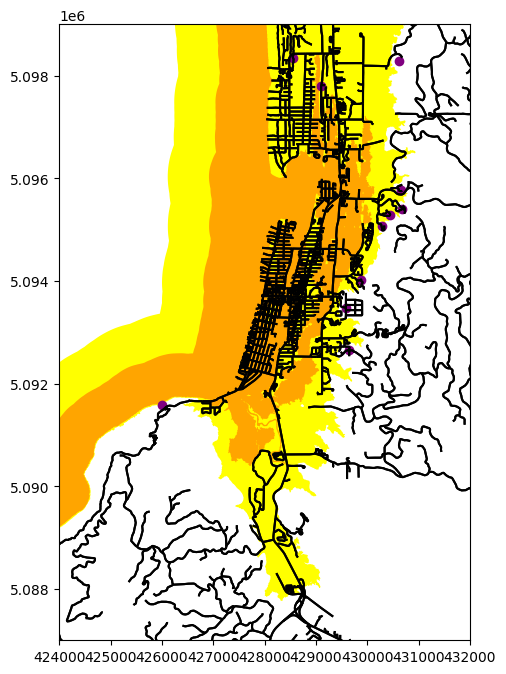

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
edge_reproject.plot(ax=ax, color="black")
#XL_clip.boundary.plot(ax=ax, color="purple")
XXL_clip.plot(ax=ax, color="yellow")
evac_clip.plot(ax=ax, color="orange")
assembly_clip.plot(ax=ax, color="purple")
seaside_buffer.boundary.plot(ax=ax, color="green")
plt.xlim(424000,432000)
plt.ylim(5.087*10**6,5.099*10**6)

In [32]:
XL_clip

Shape_Area                                           geometry
0  5.113055e+09  MULTIPOLYGON (((422644.952 5084785.365, 422643...

In [33]:
XXL_clip

Shape_Area                                           geometry
0  5.123301e+09  MULTIPOLYGON (((431826.492 5100160.536, 431844...

In [34]:
evac_clip = evac_clip[evac_clip["Id"]==2]
evac_clip

Id                Location                             Type  \
16   2  Clatsop Model - Grid B  Distant Tsunami Evacuation Zone   

                                             geometry  
16  POLYGON ((429339.139 5093815.993, 429335.995 5...

In [35]:
crit_facil = gpd.read_file('C:/Users/might/Desktop/python/490/Github/Tsunami-Scenarios/CriticalFacilities.shp')

In [36]:
crit_reproject = crit_facil.to_crs('EPSG:32610')

In [37]:
crit_clip = crit_reproject.clip(seaside_buffer)

In [38]:
bridges = crit_clip[crit_clip['Site_Type']=="BRIDGE"]

In [39]:
bridges

Id Site_Type                                Name     POINT_X    POINT_Y  \
71   0    BRIDGE    Sign Truss Br, Hwy 47 at MP 0.45 -123.917657  45.935641   
87   0    BRIDGE                   Hwy 9 over Hwy 47 -123.921076  45.938033   
86   0    BRIDGE    Sign Truss Br, Hwy 9 at MP 24.94 -123.919251  45.941527   
45   0    BRIDGE  Necanicum River, Hwy 9 (Skiberene) -123.926526  45.952902   
74   0    BRIDGE     Beerman Creek, Beerman Creek Rd -123.920687  45.965469   
85   0    BRIDGE            Circle Creek, Rippett Rd -123.928909  45.966183   
52   0    BRIDGE    Shangri La Creek, Hwy 9 (Dooley) -123.927445  45.974783   
93   0    BRIDGE          Neawanna Creek, E Broadway -123.914727  45.993133   
94   0    BRIDGE          Neawanna Creek, 12th Ave E -123.914646  46.001514   
73   0    BRIDGE           Necanicum River, Avenue U -123.927246  45.979272   
72   0    BRIDGE        Neawanna Creek, Sundquist Rd -123.919595  45.982583   
57   0    BRIDGE           Necanicum River, Avenue G -123.925566  45.989402   
70   0    BRIDGE           Necanicum River, Avenue A -123.924177  45.992064   
62   0    BRIDGE         Necanicum River, W Broadway -123.924216  45.993133   
95   0    BRIDGE            Necanicum River, 1st Ave -123.924166  45.994514   
98   0    BRIDGE     Stanley Creek, Lewis & Clark Rd -123.907846  46.010383   
42   0    BRIDGE               Neawanna Creek, Hwy 9 -123.911388  46.010814   
97   0    BRIDGE           Necanicum River, 12th Ave -123.922116  46.001494   
39   0    BRIDGE        Neacoxie Creek, Highlands Dr -123.919177  46.049703   

                          geometry  
71  POINT (428860.318 5087306.753)  
87  POINT (428598.337 5087575.570)  
86  POINT (428744.283 5087962.142)  
45  POINT (428195.047 5089232.489)  
74  POINT (428663.681 5090623.521)  
85  POINT (428027.557 5090710.234)  
52  POINT (428152.102 5091664.427)  
93  POINT (429160.815 5093691.855)  
94  POINT (429177.776 5094622.971)  
73  POINT (428173.397 5092163.003)  
72  POINT (428770.224 5092524.017)  
57  POINT (428316.602 5093286.999)  
70  POINT (428427.606 5093581.518)  
62  POINT (428425.963 5093700.326)  
95  POINT (428431.614 5093853.719)  
98  POINT (429715.537 5095602.375)  
42  POINT (429441.869 5095653.391)  
97  POINT (428599.342 5094627.409)  
39  POINT (428888.743 5099981.115)

In [40]:
distant_node_clip = node_clip.clip(evac_clip)
node_clip = node_clip.clip(XXL_clip)

In [47]:
edge_reproject

osmid            name  \
u           v          key                                                    
37740473    37740474   0                            5308996  Elkridge Court   
            37836202   0                            5316498   Skyline Drive   
            37836183   0                            5316498   Skyline Drive   
37740474    37740473   0                            5308996  Elkridge Court   
37740580    1710384467 0    [816073112, 816073113, 5316556]  Surfpines Road   
...                                                     ...             ...   
10294671571 37744581   0                            5309300             NaN   
            9765613284 0                            5309300             NaN   
10679585768 9862803136 0                         1075397722             NaN   
            2563449947 0            [1075397722, 249789653]             NaN   
            9770618384 0                         1147782123             NaN   

                                highway  oneway reversed    length  \
u           v          key                                           
37740473    37740474   0    residential   False    False    36.226   
            37836202   0    residential   False    False   126.341   
            37836183   0    residential   False     True    57.822   
37740474    37740473   0    residential   False     True    36.226   
37740580    1710384467 0    residential   False    False   465.166   
...                                 ...     ...      ...       ...   
10294671571 37744581   0          track   False    False  1990.287   
            9765613284 0          track   False     True    39.767   
10679585768 9862803136 0          track   False    False   251.192   
            2563449947 0          track   False     True  1721.422   
            9770618384 0           path   False     True    76.401   

                                                                     geometry  \
u           v          key                                                      
37740473    37740474   0    LINESTRING (429867.610 5094011.340, 429877.976...   
            37836202   0    LINESTRING (429867.610 5094011.340, 429874.145...   
            37836183   0    LINESTRING (429867.610 5094011.340, 429861.391...   
37740474    37740473   0    LINESTRING (429890.985 5094038.732, 429877.976...   
37740580    1710384467 0    LINESTRING (428428.045 5100925.445, 428435.329...   
...                                                                       ...   
10294671571 37744581   0    LINESTRING (435643.407 5095401.057, 435605.971...   
            9765613284 0    LINESTRING (435643.407 5095401.057, 435655.957...   
10679585768 9862803136 0    LINESTRING (430577.195 5100158.302, 430582.028...   
            2563449947 0    LINESTRING (430577.195 5100158.302, 430575.233...   
            9770618384 0    LINESTRING (430577.195 5100158.302, 430565.708...   

                           bridge lanes  ref maxspeed service access width  \
u           v          key                                                   
37740473    37740474   0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
            37836202   0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
            37836183   0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
37740474    37740473   0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
37740580    1710384467 0      yes   NaN  NaN      NaN     NaN    NaN   NaN   
...                           ...   ...  ...      ...     ...    ...   ...   
10294671571 37744581   0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
            9765613284 0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
10679585768 9862803136 0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
            2563449947 0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   
            9770618384 0      NaN   NaN  NaN      NaN     NaN    NaN   NaN   

                           junction tunnel  
u

In [59]:
pip install mapclassify


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import mapclassify

In [70]:
assembly_clip

Location                           notes   County  \
8        Broadway St/Hilltop Dr                            None  Clatsop   
6                    Summit Ave         OPTIONAL-Large Scenario  Clatsop   
2                  Gearhart Ave         OPTIONAL-Large Scenario  Clatsop   
3     Pine Ridge Dr/Shamrock Rd         OPTIONAL-Large Scenario  Clatsop   
5                   Sheridan Dr         OPTIONAL-Large Scenario  Clatsop   
220  Huckleberry Dr & Cooper St            E end of Huckleberry  Clastop   
221                  Skyline Dr                            None  Clatsop   
222           Thompson Falls Dr                            None  Clastop   
223              Middle Fork Rd                            None  Clatsop   
224               North Fork Rd                            None  Clastop   
7                 Royal View Dr                 Near water tank  Clatsop   
4                    Water tank  via trail/road off Salminen Ln  Clatsop   
219            Ecola State Park                            None  Clastop   

               Evac_Map                        geometry  
8    Seaside & Gearhart  POINT (429575.668 5093476.077)  
6    Seaside & Gearhart  POINT (429096.758 5097799.423)  
2    Seaside & Gearhart  POINT (428547.445 5098341.592)  
3    Seaside & Gearhart  POINT (429077.215 5099188.755)  
5    Seaside & Gearhart  POINT (428607.060 5099368.658)  
220  Seaside & Gearhart  POINT (429641.554 5092655.575)  
221  Seaside & Gearhart  POINT (429874.781 5094025.053)  
222  Seaside & Gearhart  POINT (430279.949 5095065.704)  
223  Seaside & Gearhart  POINT (430442.178 5095278.924)  
224  Seaside & Gearhart  POINT (430682.984 5095408.532)  
7    Seaside & Gearhart  POINT (430652.726 5095778.767)  
4    Seaside & Gearhart  POINT (430617.434 5098276.426)  
219  Seaside & Gearhart  POINT (426000.105 5091573.677)

In [63]:
node_reproject

y           x  street_count       highway  ref  \
osmid                                                                 
37740473     45.996086 -123.905663             3           NaN  NaN   
37740474     45.996335 -123.905365             1  turning_loop  NaN   
37740580     46.058158 -123.925288             3           NaN  NaN   
37740607     46.053406 -123.914733             3           NaN  NaN   
37740610     46.053414 -123.910275             3           NaN  NaN   
...                ...         ...           ...           ...  ...   
10269050989  45.997015 -123.880697             3           NaN  NaN   
10269055108  45.980829 -123.883278             3           NaN  NaN   
10294671570  46.009306 -123.830620             3           NaN  NaN   
10294671571  46.009159 -123.831272             3           NaN  NaN   
10679585768  46.051476 -123.897395             3           NaN  NaN   

                                   geometry  
osmid                                        
37740473     POINT (429867.610 5094011.340)  
37740474     POINT (429890.985 5094038.732)  
37740580     POINT (428428.045 5100925.445)  
37740607     POINT (429238.421 5100388.033)  
37740610     POINT (429583.252 5100384.946)  
...                                     ...  
10269050989  POINT (431802.046 5094092.833)  
10269055108  POINT (431582.252 5092296.770)  
10294671570  POINT (435694.016 5095416.863)  
10294671571  POINT (435643.407 5095401.057)  
10679585768  POINT (430577.195 5100158.302)  

[2674 rows x 6 columns]

In [68]:
m = edge_reproject.explore(
     column="length", # make choropleth based on column
     scheme="naturalbreaks",         # use mapclassify's natural breaks scheme
     tooltip="name",# show column value in tooltip (on hover)
     popup=True,                     # show all values in popup (on click)
     tiles="CartoDB positron",       # use "CartoDB positron" tiles
     cmap="Greens",                  # use "Greens" matplotlib colormap
     style_kwds=dict(color="black", weight=0.5) # use black outline with weight of 1
    )
m

In [69]:
g_proj = ox.project_graph(g, to_crs=None)

In [91]:
node_clip

y           x  street_count highway  ref  \
osmid                                                          
37835229    45.954378 -123.931793             3     NaN  NaN   
37808365    45.954389 -123.931674             3     NaN  NaN   
6384565348  45.954400 -123.931329             3     NaN  NaN   
2531169298  45.954404 -123.931197             1     NaN  NaN   
2531169368  45.954843 -123.931641             3     NaN  NaN   
...               ...         ...           ...     ...  ...   
2533176386  46.014437 -123.911140             3     NaN  NaN   
37771599    46.014683 -123.909456             3     NaN  NaN   
2533176365  46.015934 -123.909983             1     NaN  NaN   
2533176372  46.016296 -123.910265             3     NaN  NaN   
37881285    46.016306 -123.911317             3     NaN  NaN   

                                  geometry  2021554122288          id  
osmid                                                                  
37835229    POINT (427789.961 5089400.686)              5    37835229  
37808365    POINT (427799.205 5089401.789)              5    37808365  
6384565348  POINT (427825.931 5089402.655)              5  6384565348  
2531169298  POINT (427836.182 5089402.991)              5  2531169298  
2531169368  POINT (427802.290 5089452.202)              5  2531169368  
...                                    ...            ...         ...  
2533176386  POINT (429466.751 5096055.104)              5  2533176386  
37771599    POINT (429597.424 5096080.935)              5    37771599  
2533176365  POINT (429558.225 5096220.417)              5  2533176365  
2533176372  POINT (429536.885 5096260.821)              5  2533176372  
37881285    POINT (429455.417 5096262.875)              5    37881285  

[1333 rows x 8 columns]

In [85]:
node_id = node_clip
node_id["id"] = node_id.index
node_id

y           x  street_count highway  ref  \
osmid                                                          
37835229    45.954378 -123.931793             3     NaN  NaN   
37808365    45.954389 -123.931674             3     NaN  NaN   
6384565348  45.954400 -123.931329             3     NaN  NaN   
2531169298  45.954404 -123.931197             1     NaN  NaN   
2531169368  45.954843 -123.931641             3     NaN  NaN   
...               ...         ...           ...     ...  ...   
2533176386  46.014437 -123.911140             3     NaN  NaN   
37771599    46.014683 -123.909456             3     NaN  NaN   
2533176365  46.015934 -123.909983             1     NaN  NaN   
2533176372  46.016296 -123.910265             3     NaN  NaN   
37881285    46.016306 -123.911317             3     NaN  NaN   

                                  geometry  2021554122288          id  
osmid                                                                  
37835229    POINT (427789.961 5089400.686)              5    37835229  
37808365    POINT (427799.205 5089401.789)              5    37808365  
6384565348  POINT (427825.931 5089402.655)              5  6384565348  
2531169298  POINT (427836.182 5089402.991)              5  2531169298  
2531169368  POINT (427802.290 5089452.202)              5  2531169368  
...                                    ...            ...         ...  
2533176386  POINT (429466.751 5096055.104)              5  2533176386  
37771599    POINT (429597.424 5096080.935)              5    37771599  
2533176365  POINT (429558.225 5096220.417)              5  2533176365  
2533176372  POINT (429536.885 5096260.821)              5  2533176372  
37881285    POINT (429455.417 5096262.875)              5    37881285  

[1333 rows x 8 columns]

In [115]:
test_node = node_id[node_id["id"]==6384565348]
test_node


y           x  street_count highway  ref  \
osmid                                                        
6384565348  45.9544 -123.931329             3     NaN  NaN   

                                  geometry  2021554122288          id  
osmid                                                                  
6384565348  POINT (427825.931 5089402.655)              5  6384565348

In [116]:
target_node = assembly_clip[assembly_clip["Location"]=="Middle Fork Rd"]
target_node

Location notes   County            Evac_Map  \
223  Middle Fork Rd  None  Clatsop  Seaside & Gearhart   

                           geometry  
223  POINT (430442.178 5095278.924)

In [117]:
orig_xy = [test_node['geometry'].y.values[0], test_node['geometry'].x.values[0]]
target_xy = [target_node['geometry'].y.values[0], target_node['geometry'].x.values[0]]

In [118]:
orig_n = ox.distance.nearest_nodes(g_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)
target_n = ox.distance.nearest_nodes(g_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [119]:
orig_n

6384565348

In [120]:
route = nx.shortest_path(g_proj, source=orig_n, target=target_n, weight='length')

In [99]:
# Plot the shortest path using folium
m = ox.plot_route_folium(g, route, weight=5)
m

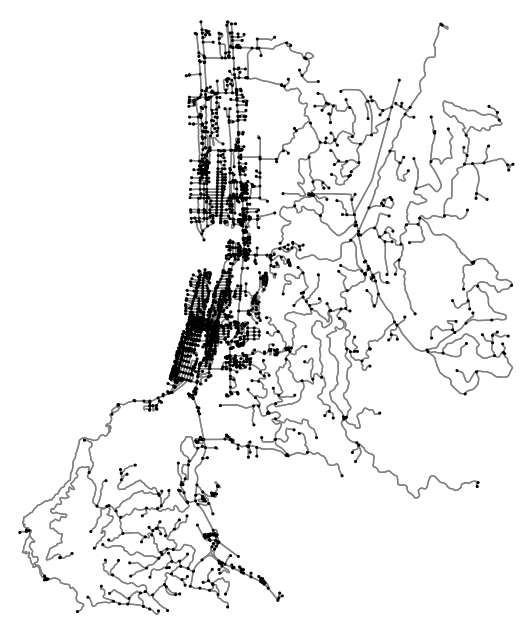

In [77]:
fig, ax = ox.plot_graph(g_proj, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [121]:
target_xy = [assembly_clip['geometry'].y.values, assembly_clip['geometry'].x.values]
target_nodes = ox.distance.nearest_nodes(g_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)


In [122]:
origin_xy =[node_clip['geometry'].y.values, node_clip['geometry'].x.values]
origin_nodes= ox.distance.nearest_nodes(g_proj, X=origin_xy[1], Y=origin_xy[0], return_dist=False)

In [123]:
target_nodes

[37859192,
 37836113,
 37887542,
 37845133,
 1710264089,
 1311351367,
 37740473,
 1710261227,
 1710261859,
 2533148077,
 2533131476,
 2533211231,
 2530540780]

In [125]:
orig_node

y           x  street_count highway  ref  \
osmid                                                          
2530540847  45.976465 -123.929621             1     NaN  NaN   

                                  geometry  2021554122288          id  
osmid                                                                  
2530540847  POINT (427986.892 5091852.657)              5  2530540847

In [126]:
orig_node = node_id[node_id["id"]==2530540847]
orig_xy = [orig_node['geometry'].y.values[0], orig_node['geometry'].x.values[0]]
orig_n = ox.distance.nearest_nodes(g_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

In [127]:
orig_n

2530540847

In [132]:
len(target_nodes)

13

In [133]:
routes = []
lengths = []
for i in range(len(target_nodes)):
    routes.append(nx.shortest_path(g_proj, source=orig_n, target=target_nodes[i], weight='length'))
    lengths.append(nx.shortest_path_length(g_proj, source=orig_n, target=target_nodes[i], weight='length'))

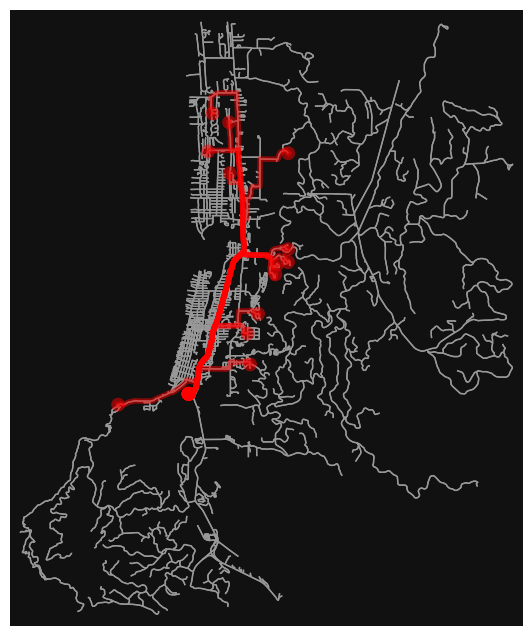

In [136]:

fig, ax = ox.plot_graph_routes(g_proj, routes,route_linewidth=6, node_size=0)

In [137]:
routes = []
lengths = []
for i in range(len(target_nodes)):
    routes.append(nx.shortest_path(g_proj, source=origin_nodes[i], target=target_nodes[i], weight='length'))
    lengths.append(nx.shortest_path_length(g_proj, source=origin_nodes[i], target=target_nodes[i], weight='length'))

In [140]:
lengths

[6794.655,
 10391.111999999996,
 11558.738999999998,
 11714.498,
 13488.576999999994,
 6696.893,
 4967.628000000001,
 7121.356,
 6691.341000000001,
 6883.498,
 9617.676999999998,
 12473.917,
 7266.28]

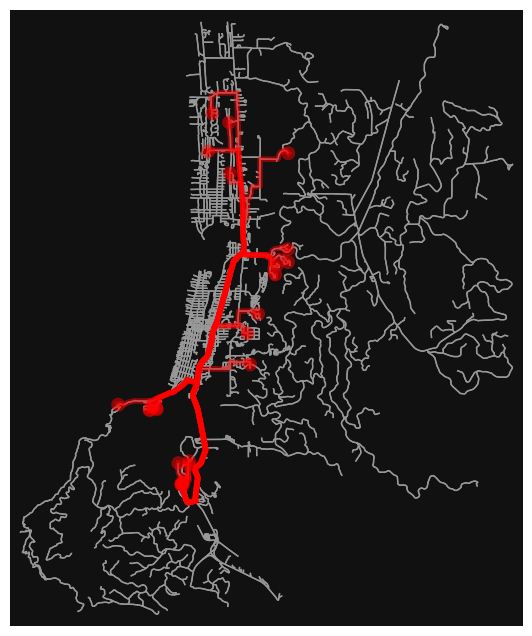

In [138]:
fig, ax = ox.plot_graph_routes(g_proj, routes,route_linewidth=6, node_size=0)